# Aufgabe 1: "fully-connected neuronales Netz" für Bilddaten

### CNN Seminar des Biomedical Data Science Curriculums

<span style="color:red">**Anmerkung:** Version mit Lösung für die Lehrprobe, Universitätsmedizin Göttingen
Freitag, 25. September 2020 </span>


**Ziel:** Training eines "fully-connected neuronalen Netz" für die Klassifikation der MNIST Zahlen

<img src="figures/example_1.png" width=500px>

**ToDo:**
- Vervollständigen Sie die Lücken im Code (mit #ToDo und Kommentar versehenen)
- Führen Sie am Ende die Selbstkontrolle aus, um die Funktionalität sicherzustellen
- Reichen Sie den finalen Code per Email als *.html Export ein

**Freiwillige Zusatzaufgaben:**
- Implementieren Sie ein mehrschichtiges neuronales Netz

**Lernziele:**
- Kennenlernen der MNIST Daten
- Definition eines neuronalen Netz in PyTorch
- Erlernen einen Tensor zu "flatten"

In [2]:
# Vorbereitung - keine Änderungen in diesem Block notwendig

# Import der Bibliotheken
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Definition von "transform" um die Daten zu normalisieren
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)), ])

# Download der MNIST Daten
data_set = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

# Daten Aufteilung und Definition des "trainloader"
train_set, val_set = torch.utils.data.random_split(data_set, [50000, 10000])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=True)

In [ ]:
# Teilaufgabe 1: Definiere ein einfaches NN mit 768 input features und 10 output features (für die Ziffern 0 - 9)
model = nn.Sequential(#ToDo,
                      nn.LogSoftmax(dim=1))

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

# Äußerer Loop für die Epochen
epochs = 10
for e in range(epochs):
    
    # Loop für Training
    running_train_loss = 0
    for images, labels in train_loader:
        
        # Teilaufgabe 2: "Flatten" des Inputs, wandeln Sie den [batch_size, 1, 28, 28] "images" Tensor 
        # in ein [batch_size, 784] Tesnor um
        images = # ToDo
    
        optimizer.zero_grad()
        
        # Teilaufgabe 3: Generieren Sie den "output" des NNs (forward pass),
        # errechnen Sie den "train_loss" mit Hilfe "loss_function", dem output und den wahren "labels"
        output = # ToDo
        train_loss = # ToDo
        
        train_loss.backward()
        optimizer.step()
        
        running_train_loss += train_loss.item()
        
    print(f"Training loss: {running_train_loss/len(train_loader)}")
    
    # Loop für Validation
    running_val_loss = 0
    for images, labels in val_loader:
        
        images = # ToDo, siehe oben
        
        output = # ToDo, siehe oben
        val_loss = # ToDo, siehe oben
        
        running_val_loss += val_loss.item()
        
    print(f"Validation loss: {running_val_loss/len(val_loader)}")

## Lösung

<span style="color:red">**Anmerkung:** Version mit Lösung für die Lehrprobe, Universitätsmedizin Göttingen
Freitag, 25. September 2020 </span>

In [3]:
# Teilaufgabe 1: Definiere ein einfaches NN mit 768 input features und 10 output features (für die Ziffern 0 - 9)
model = nn.Sequential(nn.Linear(784, 10),
                      nn.LogSoftmax(dim=1))



#Alternative Lösung: NN mit hidden layers
#model = nn.Sequential(nn.Linear(784, 128),
#                      nn.ReLU(),
#                      nn.Linear(128, 64),
#                      nn.ReLU(),
#                      nn.Linear(64, 10),
#                      nn.LogSoftmax(dim=1))


loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

# Äußerer Loop für die Epochen
epochs = 10
for e in range(epochs):
    
    # Loop für Training
    running_train_loss = 0
    for images, labels in train_loader:
        
        # Teilaufgabe 1: "Flatten" des Inputs, wandeln Sie den [batch_size, 1, 28, 28] "images" Tensor 
        # in ein [batch_size, 784] Tesnor um
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        
        # Teilaufgabe 2: Generieren Sie den "output" des NNs (forward pass),
        # errechnen Sie den "train_loss" mit Hilfe "loss_function", dem output und den wahren "labels"
        output = model(images)
        train_loss = loss_function(output, labels)
        
        train_loss.backward()
        optimizer.step()
        
        running_train_loss += train_loss.item()
        
    print(f"Training loss: {running_train_loss/len(train_loader)}")
    
    # Loop für Validation
    running_val_loss = 0
    for images, labels in val_loader:
        
        images = images.view(images.shape[0], -1)
        
        output = model(images)
        val_loss = loss_function(output, labels)
        
        running_val_loss += val_loss.item()
        
    print(f"Validation loss: {running_val_loss/len(val_loader)}")
    
    

Training loss: 0.981009046897254
Validation loss: 0.629997207480631
Training loss: 0.539974057384769
Validation loss: 0.504897692021291
Training loss: 0.4616165934392558
Validation loss: 0.45502340822083176
Training loss: 0.4235408054974378
Validation loss: 0.4280736792808885
Training loss: 0.4001792473408877
Validation loss: 0.40618701317128103
Training loss: 0.3842665891894294
Validation loss: 0.3937177842210053
Training loss: 0.3720266922469944
Validation loss: 0.38331136439636254
Training loss: 0.36206517486697265
Validation loss: 0.3736775732913594
Training loss: 0.35459228747945915
Validation loss: 0.37019144596567577
Training loss: 0.34809563491884093
Validation loss: 0.3619562898092209


### Selbstkontrolle
Führen Sie den folgenden Code aus, um die Funktion Ihres NN zu überprüfen.

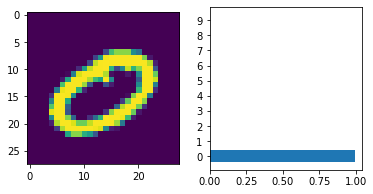

In [4]:
# Extraktion eines Beispielbilds
images, labels = next(iter(val_loader))
img = images[0].view(1, 784)

# NN ausführen
pred_logprobs = model(img)

# Log-Wahrscheinlichkeit zu Standardeinheitsintervall
pred_probs = torch.exp(pred_logprobs)

# Plotten des Ergebnisses
fig, (ax1, ax2) = plt.subplots(figsize=(6,3), ncols=2)

ax1.imshow(images[0][0])
ax2.barh(np.arange(10), pred_probs[0].data.numpy().squeeze())
ax2.set_yticks(np.arange(10))